In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nobel-prize-from-1901-till-2020/nobel_final.csv


## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2020. Let's load it in and take a look.</p>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading in the Nobel Prize data
nobel = pd.read_csv('../input/nobel-prize-from-1901-till-2020/nobel_final.csv')

# Taking a look at the first several winners
nobel.head(10)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36
6,Marie,Curie,PL,FR,female,1911,chemistry,1,Sorbonne University,Paris,France,Nov,67,44
7,Lord,Rayleigh,GB,GB,male,1904,physics,1,Royal Institution of Great Britain,London,United Kingdom,Nov,77,62
8,Philipp,Lenard,SK,DE,male,1905,physics,1,Kiel University,Kiel,Germany,Jun,85,43
9,J.J.,Thomson,GB,GB,male,1906,physics,1,University of Cambridge,Cambridge,United Kingdom,Dec,84,50


In [3]:
nobel.dtypes

firstname                object
surname                  object
born_country_code        object
died_country_code        object
gender                   object
year                      int64
category                 object
share                     int64
name_of_university       object
city_of_university       object
country_of_university    object
born_month               object
age                       int64
age_get_prize             int64
dtype: object

## 2. So, who gets the Nobel Prize?

In [4]:
display(len(nobel))
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['gender'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
nobel['born_country_code'].value_counts().head(10)

923

male      869
female     54
Name: gender, dtype: int64

US    274
GB    103
DE     82
FR     56
SE     29
PL     28
JP     27
RU     26
CA     20
IT     19
Name: born_country_code, dtype: int64

## 3. USA dominance


    decade  usa_born_winner
0     1900         0.017857
1     1910         0.078947
2     1920         0.074074
3     1930         0.254545
4     1940         0.325000
5     1950         0.295775
6     1960         0.280000
7     1970         0.320388
8     1980         0.329787
9     1990         0.415842
10    2000         0.436975
11    2010         0.333333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1910'),
  Text(2, 0, '1920'),
  Text(3, 0, '1930'),
  Text(4, 0, '1940'),
  Text(5, 0, '1950'),
  Text(6, 0, '1960'),
  Text(7, 0, '1970'),
  Text(8, 0, '1980'),
  Text(9, 0, '1990'),
  Text(10, 0, '2000'),
  Text(11, 0, '2010')])

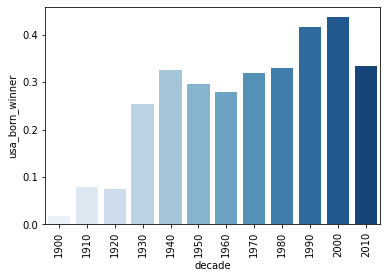

In [5]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['born_country_code'] == 'US'

nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners =  nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
print(prop_usa_winners)
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=prop_usa_winners['decade'],
           y=prop_usa_winners['usa_born_winner'],
        palette='Blues')
plt.xticks(rotation=90)

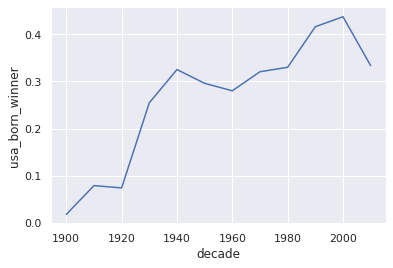

In [6]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
#import matplotlib.pyplot as plt
# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis


## 5. What is the gender of a typical Nobel Prize winner?


In [7]:
nobel.columns

Index(['firstname', 'surname', 'born_country_code', 'died_country_code',
       'gender', 'year', 'category', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'born_month', 'age',
       'age_get_prize', 'usa_born_winner', 'decade'],
      dtype='object')

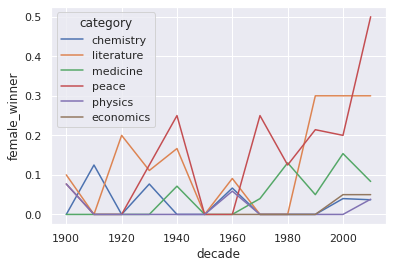

In [8]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['gender'] == 'female'
prop_female_winners = nobel.groupby(['decade', 'category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)


## 6. The first woman to win the Nobel Prize


In [9]:
nobel[nobel.gender == 'female'].nsmallest(1, 'year')

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True


## 7. Repeat laureates


In [10]:
nobel['full_name']=nobel.firstname+" "+nobel.surname
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner,full_name
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True,Marie Curie
6,Marie,Curie,PL,FR,female,1911,chemistry,1,Sorbonne University,Paris,France,Nov,67,44,False,1910,True,Marie Curie
65,John,Bardeen,US,US,male,1956,physics,3,University of Illinois,Urbana IL,USA,May,83,48,True,1950,False,John Bardeen
66,John,Bardeen,US,US,male,1972,physics,3,University of Illinois,Urbana IL,USA,May,83,64,True,1970,False,John Bardeen
214,Linus,Pauling,US,US,male,1962,peace,1,California Institute of Technology (Caltech),Pasadena CA,USA,Feb,93,61,True,1960,False,Linus Pauling
215,Linus,Pauling,US,US,male,1954,chemistry,1,California Institute of Technology (Caltech),Pasadena CA,USA,Feb,93,53,True,1950,False,Linus Pauling
220,Frederick,Sanger,GB,GB,male,1958,chemistry,1,University of Cambridge,Cambridge,United Kingdom,Aug,95,40,False,1950,False,Frederick Sanger
221,Frederick,Sanger,GB,GB,male,1980,chemistry,4,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,Aug,95,62,False,1980,False,Frederick Sanger


## 8. How old are you when you get the prize?


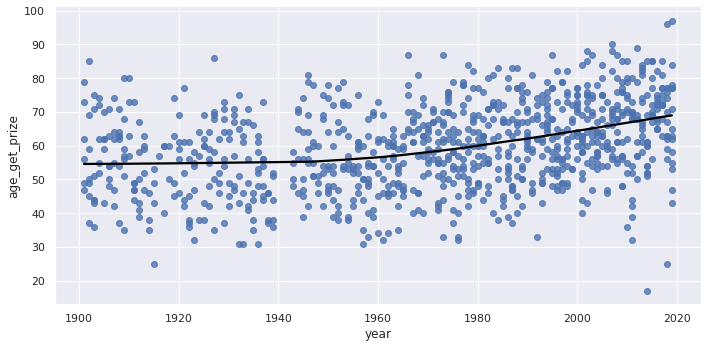

In [11]:
# Converting birth_date from String to datetime
# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age_get_prize', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

## 9. Age differences between prize categories


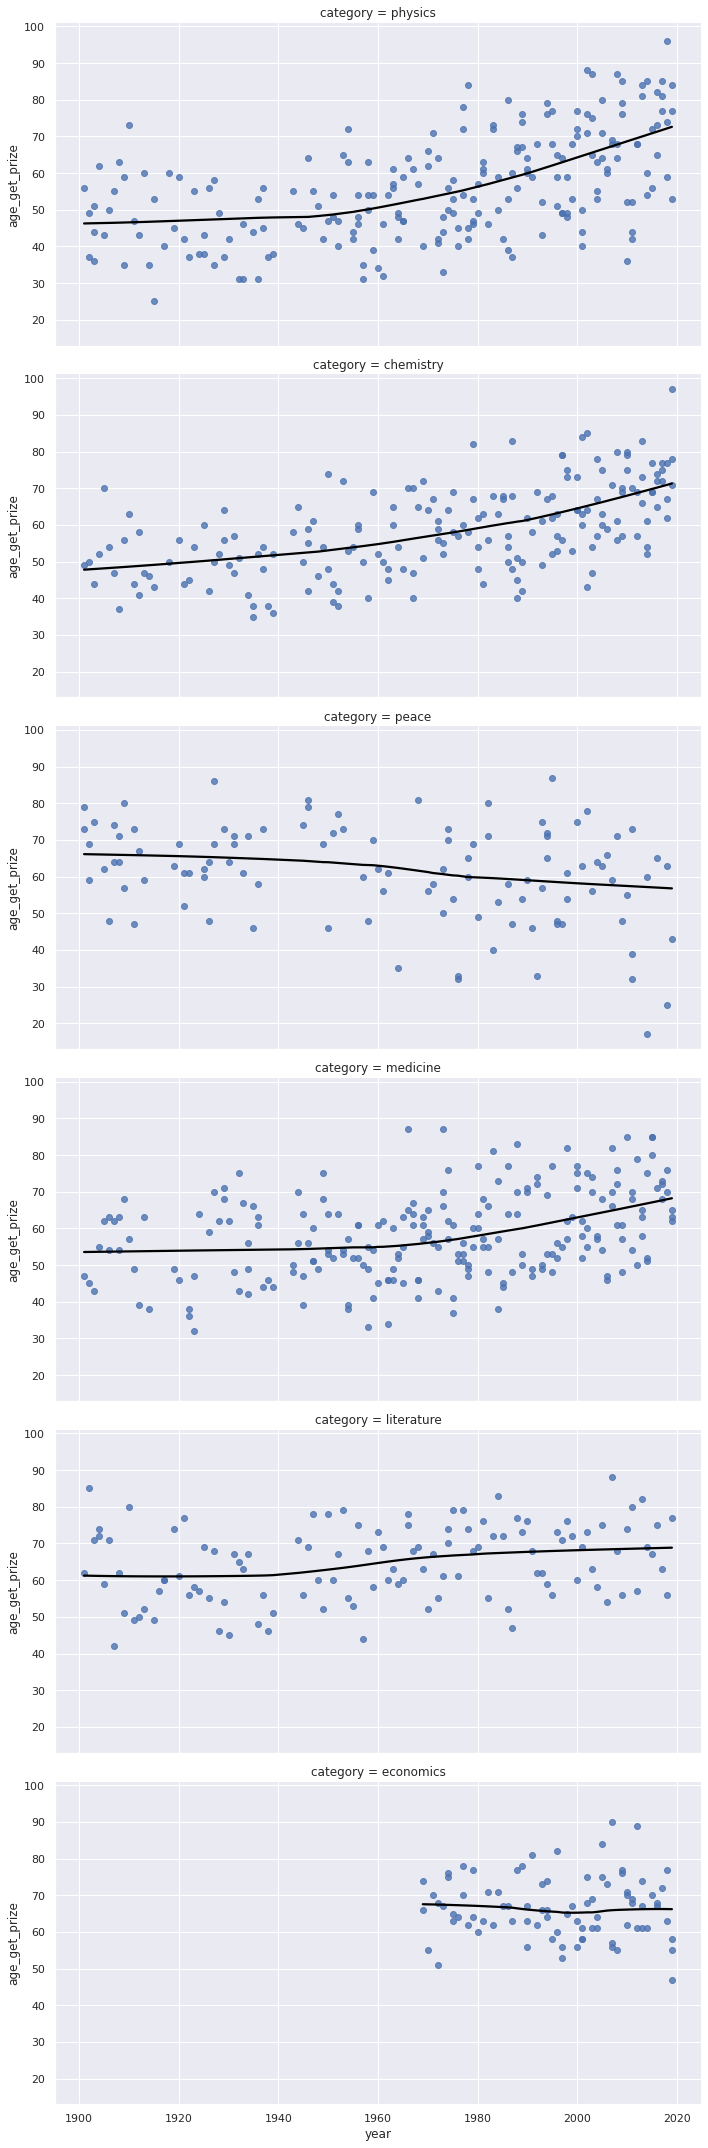

In [12]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age_get_prize', row='category', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

## 10. Oldest and youngest winners


In [13]:
nobel.sort_values(by=['age_get_prize']).iloc[-1]

firstname                               John
surname                           Goodenough
born_country_code                         DE
died_country_code                        NaN
gender                                  male
year                                    2019
category                           chemistry
share                                      3
name_of_university       University of Texas
city_of_university                 Austin TX
country_of_university                    USA
born_month                               Jul
age                                       98
age_get_prize                             97
usa_born_winner                        False
decade                                  2010
female_winner                          False
full_name                    John Goodenough
Name: 914, dtype: object

## 10. Youngest and youngest winners

In [14]:
nobel.sort_values(by=['age_get_prize']).iloc[0]

firstname                          Malala
surname                         Yousafzai
born_country_code                      PK
died_country_code                     NaN
gender                             female
year                                 2014
category                            peace
share                                   2
name_of_university                    NaN
city_of_university                    NaN
country_of_university                 NaN
born_month                            Jul
age                                    23
age_get_prize                          17
usa_born_winner                     False
decade                               2010
female_winner                        True
full_name                Malala Yousafzai
Name: 862, dtype: object